In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

# Loading the datasets

In [2]:
df_train=pd.read_csv('DATASET/train.csv')
df_test=pd.read_csv('DATASET/test.csv')

# EDA

In [3]:
df_train.columns

Index(['w', 'y', 'square_meters', 'contract_type', 'availability',
       'description', 'other_features', 'conditions', 'floor', 'elevator',
       'energy_efficiency_class', 'condominium_fees', 'zone'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   w                        4500 non-null   int64  
 1   y                        4500 non-null   int64  
 2   square_meters            4500 non-null   int64  
 3   contract_type            4500 non-null   object 
 4   availability             3855 non-null   object 
 5   description              4500 non-null   object 
 6   other_features           4492 non-null   object 
 7   conditions               4391 non-null   object 
 8   floor                    4494 non-null   object 
 9   elevator                 4500 non-null   object 
 10  energy_efficiency_class  4120 non-null   object 
 11  condominium_fees         4303 non-null   float64
 12  zone                     4500 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 457.2+ KB


In [5]:
df_test.columns

Index(['square_meters', 'contract_type', 'availability', 'description',
       'other_features', 'conditions', 'floor', 'elevator',
       'energy_efficiency_class', 'condominium_fees', 'zone'],
      dtype='object')

In [6]:
df_train.head(10)

,w,y,square_meters,contract_type,availability,description,other_features,conditions,floor,elevator,energy_efficiency_class,condominium_fees,zone
0,1,3000,110,rent,NaN,"4 (2 bedrooms, 2 others), 1 bathroom - one or ...",kitchen | balcony | terrace | furnished | cell...,excellent,1,yes,e,500.0,quadronno - crocetta
1,1,2200,111,rent,available,"3 (2 bedrooms, 1 other), 1 bathroom, kitchen d...",electric gate | optic fiber | alarm system | c...,excellent,6,yes,e,400.0,farini
2,1,2500,85,rent | 4+4,NaN,"3 (2 bedrooms, 1 other), 2 bathrooms, open kit...",internal exposure | balcony | full day concier...,good condition,4,yes,g,250.0,palestro
3,1,1250,40,rent,available,"1 room, 1 bathroom, kitchen nook",optic fiber | security door | internal exposur...,excellent,2,yes,e,90.0,repubblica
4,1,4200,170,rent | open,available,"4 (2 bedrooms, 2 others), 3 bathrooms, kitchen...",fireplace | optic fiber | security door | balc...,excellent,4,yes,g,833.0,morgagni
5,1,5000,220,rent | 4+4,available,"5 (4 bedrooms, 1 other), 3 bathrooms, kitchen ...",optic fiber | video entryphone | security door...,excellent,1,yes,e,525.0,centrale
6,1,1420,85,rent | 4+4,NaN,"3 (2 bedrooms, 1 other), 1 bathroom, semi-habi...",electric gate | optic fiber | video entryphone...,excellent,8,yes,f,280.0,frua
7,1,1600,70,rent | 4+4,available,"3 (2 bedrooms, 1 other), 1 bathroom, open kitchen",electric gate | optic fiber | security door | ...,excellent,2,yes,f,200.0,piazzale siena
8,1,4000,150,rent | 4+4,available,"4 (3 bedrooms, 1 other), 3 bathrooms, open kit...",electric gate | optic fiber | video entryphone...,excellent,8,yes,NaN,580.0,lodi - brenta
9,1,2400,40,rent | transitory,available from 20/04/2024,"2 (1 bedroom, 1 other), 1 bathroom, open kitchen",optic fiber | security door | external exposur...,excellent,3,no,c,0.0,lanza


## Missing Values

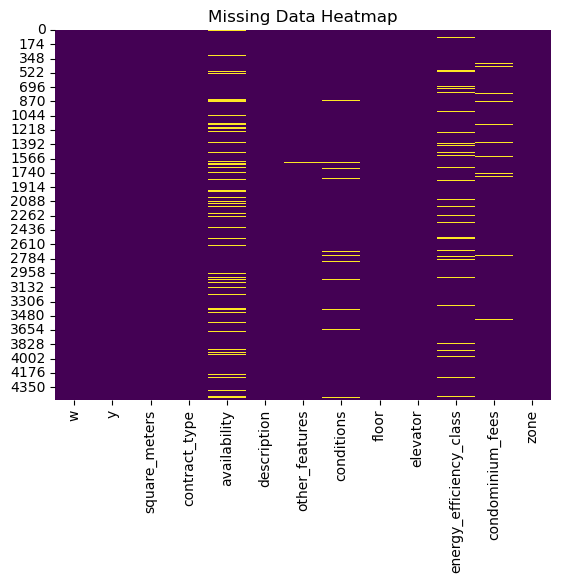

In [8]:
sns.heatmap(df_train.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
df_train[['availability','conditions','energy_efficiency_class','condominium_fees','other_features']].isna().sum()

availability               645
conditions                 109
energy_efficiency_class    380
condominium_fees           197
other_features               8
dtype: int64

In [10]:
df_train[df_train['condominium_fees'].isna()]

,w,y,square_meters,contract_type,availability,description,other_features,conditions,floor,elevator,energy_efficiency_class,condominium_fees,zone
12,1,1300,60,rent,available,"2 (1 bedroom, 1 other), 1 bathroom",alarm system | kitchen | furnished | cellar | ...,excellent,3,no,a,NaN,cascina merlata - musocco
38,1,1300,70,rent,available,"2 (1 bedroom, 1 other), 1 bathroom, kitchenette",video entryphone | security door | external ex...,good condition,2,yes,g,NaN,cermenate - abbiategrasso
112,1,850,28,rent,available,"1 bedroom, 1 bathroom, open kitchen",security door | full day concierge | furnished...,excellent,Ground floor,no,f,NaN,parco trotter
155,1,2900,135,rent | 4+4,available,"3 (2 bedrooms, 1 other), 2 bathrooms, semi-hab...",tennis court | electric gate | optic fiber | a...,NaN,4,yes,g,NaN,vincenzo monti
181,1,2200,85,rent,available,"3 (2 bedrooms, 1 other), 1 bathroom, open kitchen",electric gate | optic fiber | video entryphone...,excellent,5,yes,a,NaN,bisceglie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,1,2950,145,rent,NaN,"3 (2 bedrooms, 1 other), 2 bathrooms, kitchen ...",electric gate | optic fiber | video entryphone...,excellent,3,yes,e,NaN,plebisciti - susa
4420,1,1900,85,rent | 4+4,available,"3 (1 bedroom, 2 others), 1 bathroom, kitchen d...",optic fiber | video entryphone | security door...,excellent,4,yes,f,NaN,san siro
4460,1,3200,93,rent | 4+4,available,"3 bedrooms, 2 bathrooms, semi-habitable kitchen",security door | terrace | full day concierge |...,excellent,5,yes,f,NaN,montenero
4461,1,1500,62,rent,available,"3 (2 bedrooms, 1 other), 1 bathroom, open kitchen",video entryphone | balcony | full day concierg...,excellent,3,yes,NaN,NaN,chiesa rossa


## Columns Exploration

### Conditions

In [7]:
print(len(df_train['conditions'].unique()))
df_train['conditions'].unique()

4


array(['excellent', 'good condition', nan, 'new'], dtype=object)

### Contract Renting type

In [ ]:
print(len(df_train['contract_type'].unique()))
df_train['contract_type'].unique()

7


array(['rent', 'rent | 4+4', 'rent | open', 'rent | transitory',
       'rent | students (6 - 36 months)', 'rent | 3+2', 'rent | 6+6'],
      dtype=object)

### Condominium Fees

Searching online the average condominium fee for Milan is € 162 so we can assume this amount is monthly.

In [11]:
print(len(df_train['condominium_fees'].unique()))
df_train['condominium_fees'].unique()
# print(df_train[df_train['condominium_fees']==0])
df_train['condominium_fees'].describe()

266


count    4303.000000
mean      188.478968
std       198.656302
min         0.000000
25%        80.000000
50%       150.000000
75%       250.000000
max      4650.000000
Name: condominium_fees, dtype: float64

### Elevator

In [12]:
print(len(df_train['elevator'].unique()))
df_train['elevator'].unique()

2


array(['yes', 'no'], dtype=object)

### Energy efficiency

In [ ]:
print(len(df_train['energy_efficiency_class'].unique()))
df_train['energy_efficiency_class'].unique()

9


array(['e', 'g', 'f', nan, 'c', 'a', 'd', 'b', ','], dtype=object)

### Floor

In [ ]:
print(len(df_train['floor'].unique()))
df_train['floor'].unique()

13


array(['1', '6', '4', '2', '8', '3', 'Ground floor', '5', 'Mezzanine',
       '7', 'Semi-basement', nan, '9'], dtype=object)

### Weights

In [ ]:
df_train['w'].describe()

,w
count,4500.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


### Zones

In [ ]:
print(len(df_train['zone'].unique()))
df_train['zone'].unique()

132


array(['quadronno - crocetta', 'farini', 'palestro', 'repubblica',
       'morgagni', 'centrale', 'frua', 'piazzale siena', 'lodi - brenta',
       'lanza', 'bovisa', 'ripamonti', 'cascina merlata - musocco',
       'bignami - ponale', 'buenos aires', 'dergano', 'plebisciti - susa',
       'paolo sarpi', 'brera', 'montenero', 'guastalla', 'pasteur',
       'piave - tricolore', 'turro', 'gambara', 'maggiolina',
       "porta romana - medaglie d'oro", 'giambellino', 'moscova',
       'città studi', 'cermenate - abbiategrasso', 'porta nuova',
       'istria', 'rubattino', 'barona', 'isola', 'missori',
       'monte rosa - lotto', 'solari', 'scala - manzoni', 'gallaratese',
       'turati', 'corso san gottardo', 'carrobbio', 'washington',
       'sempione', 'quarto cagnino', 'parco trotter', 'pezzotti - meda',
       'cadorna - castello', 'quartiere adriano', 'udine',
       'garibaldi - corso como', 'cenisio', 'bisceglie', 'corvetto',
       'tripoli - soderini', 'vincenzo monti', 'martin

## Descriptive statistics

In [48]:
pd.DataFrame({
    'y': df_train['y'],
    'log_y': np.log(df_train['y'])
}).describe()

,y,log_y
count,4500.000000,4500.000000
mean,1983.720667,7.442325
std,1302.870057,0.517575
min,450.000000,6.109248
25%,1200.000000,7.090077
50%,1550.000000,7.346010
75%,2400.000000,7.783224
max,9300.000000,9.137770


In [31]:
df_train.groupby('contract_type')['y'].agg(['count','mean','median','std'])

,count,mean,median,std
contract_type,,,,
rent,1122,1755.387701,1400.0,1159.441873
rent | 3+2,24,1628.125000,1200.0,880.260550
rent | 4+4,1883,2049.635688,1650.0,1344.996254
rent | 6+6,13,1612.846154,1200.0,1572.083111
rent | open,308,1666.168831,1393.0,1084.568821
rent | students (6 - 36 months),15,1324.133333,1300.0,486.511029
rent | transitory,1135,2206.740088,1800.0,1376.271542


In [32]:
df_train.groupby('energy_efficiency_class')['y'].agg(['count','mean','median','std'])

,count,mean,median,std
energy_efficiency_class,,,,
",",2,1200.000000,1200.0,494.974747
a,322,1977.478261,1600.0,1404.407493
b,134,1715.447761,1375.0,1115.797483
c,664,2623.787651,2300.0,1512.370565
d,393,2012.312977,1650.0,1080.929502
e,576,1976.144097,1500.0,1380.953271
f,754,1756.297082,1438.0,1024.222955
g,1275,1857.690980,1450.0,1289.688969


In [38]:
df_train.groupby('zone')['y'].agg(['count','mean','median','std']).sort_values('count', ascending=False)

,count,mean,median,std
zone,,,,
città studi,128,1608.664062,1315.0,889.429714
porta romana - medaglie d'oro,124,1821.967742,1500.0,831.021586
navigli - darsena,122,1630.737705,1500.0,719.305126
solari,112,1871.062500,1725.0,681.404991
sempione,100,1982.970000,1800.0,685.095930
...,...,...,...,...
primaticcio,5,945.000000,950.0,162.403818
quarto oggiaro,4,1125.000000,1000.0,287.228132
comasina,4,925.000000,1000.0,221.735578


## Columns Visualization

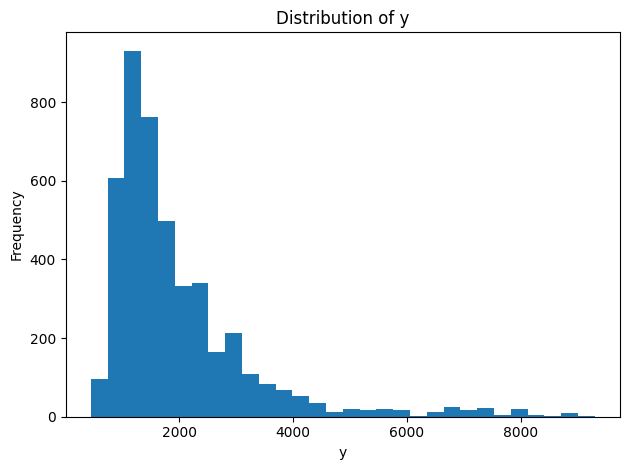

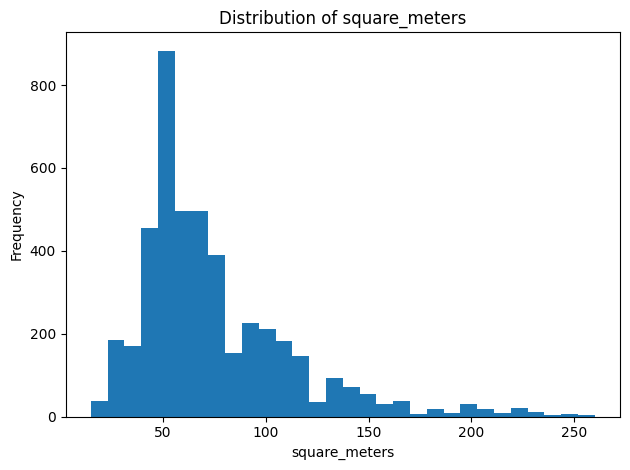

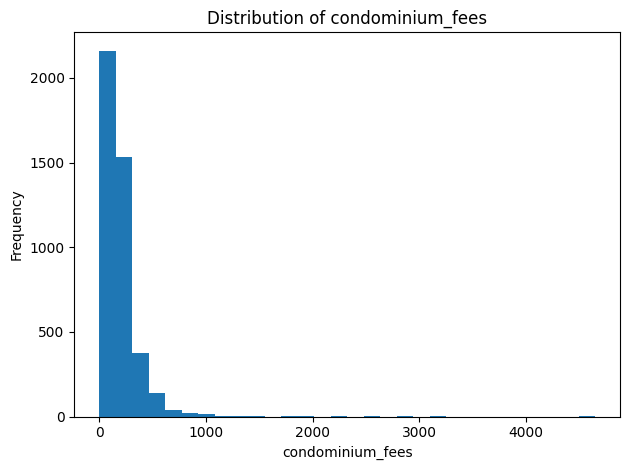

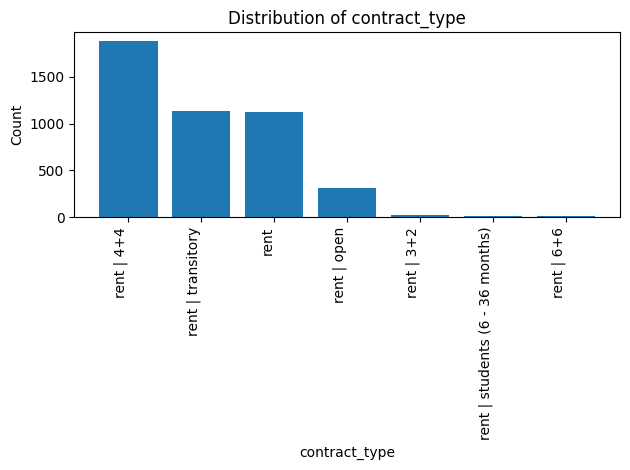

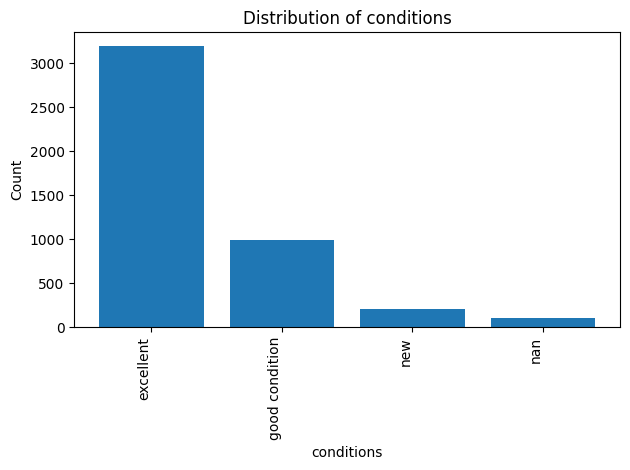

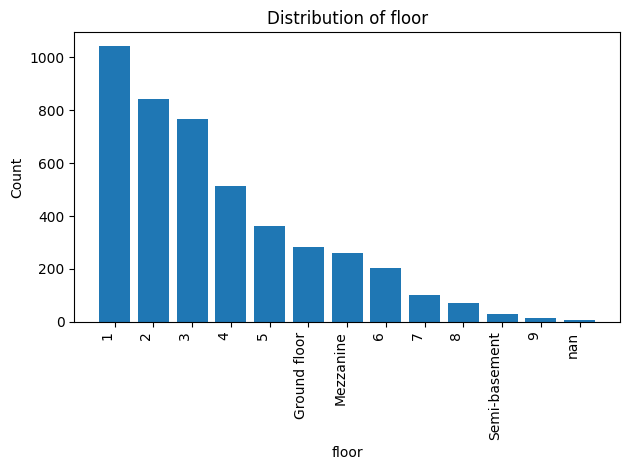

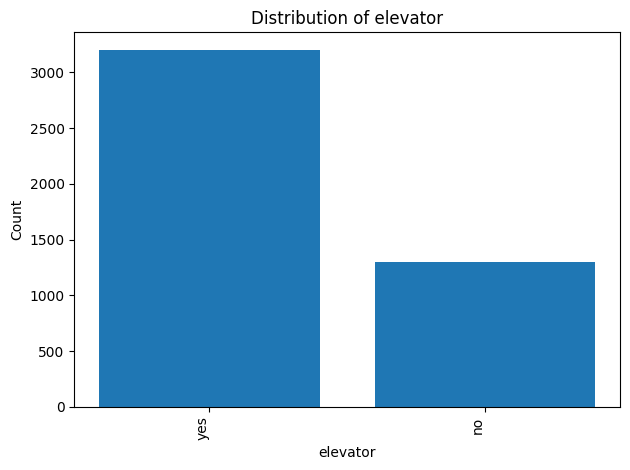

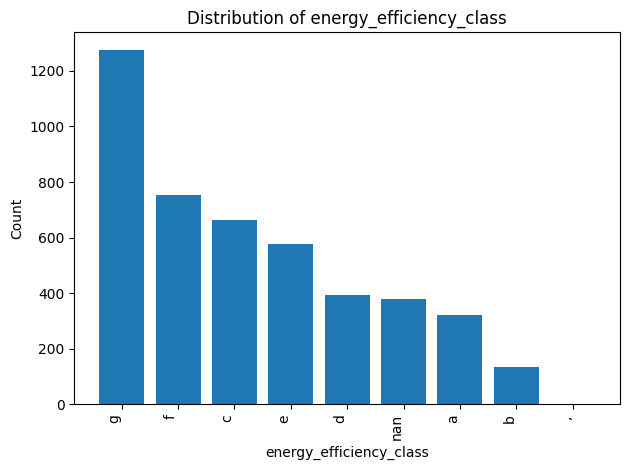

In [ ]:
# Define which columns are numeric vs. categorical
numeric_cols = ['y', 'square_meters', 'condominium_fees']
categorical_cols = [
    'contract_type', 'conditions', 'floor',
    'elevator', 'energy_efficiency_class'
]

# Plot numeric distributions as histograms
for col in numeric_cols:
    plt.figure()
    plt.hist(df_train[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot categorical distributions as bar charts
for col in categorical_cols:
    plt.figure()
    counts = df_train[col].value_counts(dropna=False)
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

### Zones histogram

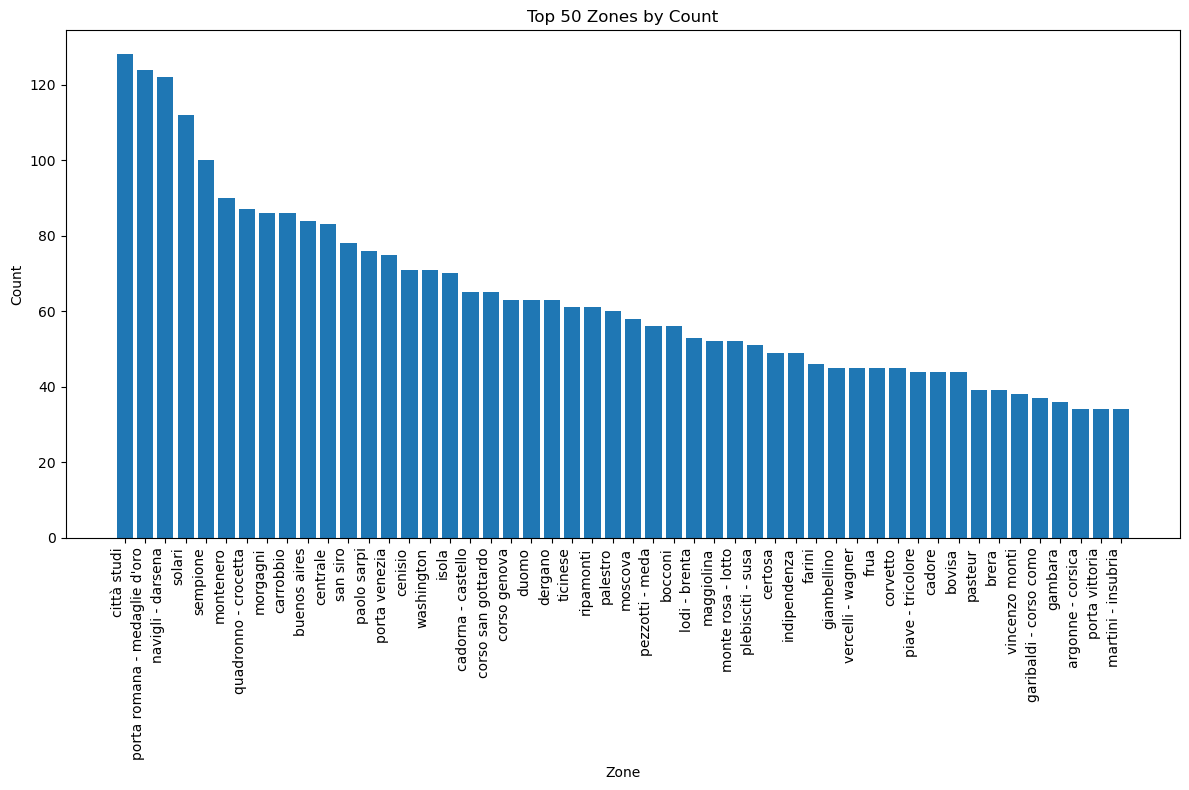

In [13]:
top50 = df_train['zone'].value_counts(dropna=True).head(50)

# Plot
plt.figure(figsize=(12, 8))
plt.bar(top50.index.astype(str), top50.values)
plt.title('Top 50 Zones by Count')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [45]:
zone_counts = df_train['zone'].value_counts().reset_index()
zone_counts.columns = ['zone', 'count']

# Calculate percentage and cumulative percentage
zone_counts['percentage'] = zone_counts['count'] / zone_counts['count'].sum()
zone_counts['cumulative_percentage'] = zone_counts['percentage'].cumsum()

len(zone_counts[zone_counts['cumulative_percentage']<0.8])

64

### Average price for rent zone

<ipython-input-64-54cc102943dc>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(zone_stats.index, rotation=90)


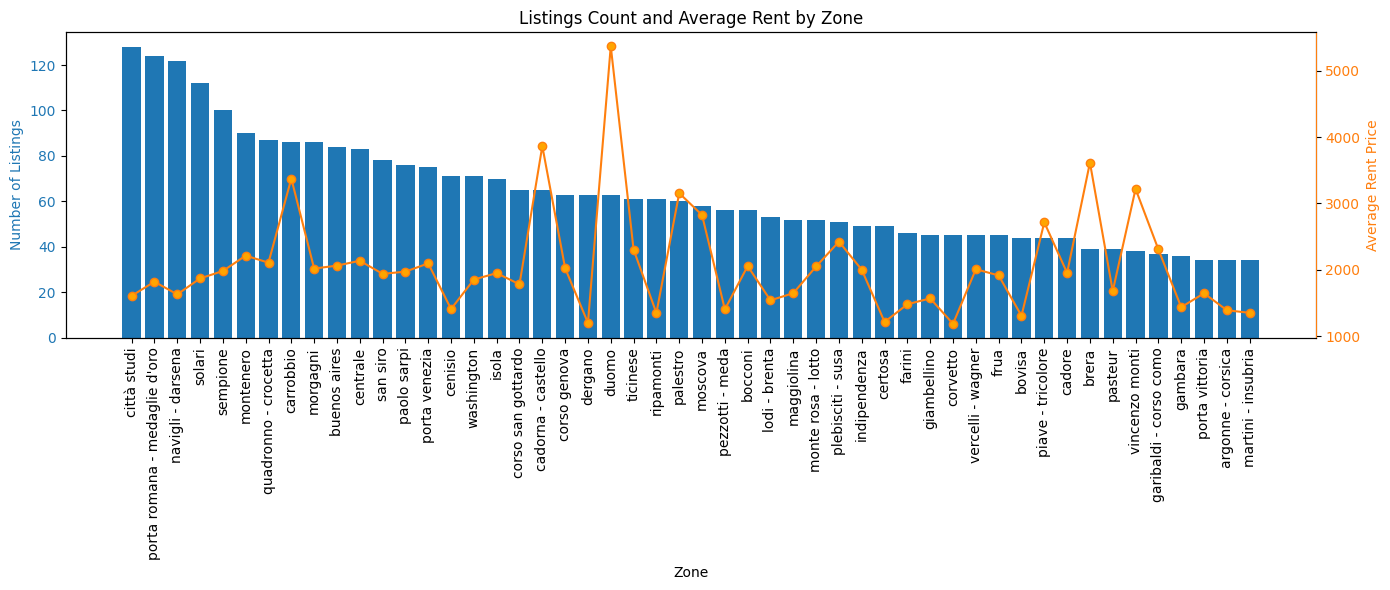

In [ ]:
# 1) Aggregate: count of listings and mean rent per zone
zone_stats = (
    df_train
      .groupby('zone')['y']
      .agg(count='size', mean_rent='median')
      .sort_values('count', ascending=False)
)

# (Optional) If you only want the top 50 zones by count:
zone_stats = zone_stats.head(50)

# 2) Set up the figure and first axis (counts)
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.bar(zone_stats.index, zone_stats['count'])
ax1.set_xlabel('Zone')
ax1.set_ylabel('Number of Listings', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(zone_stats.index, rotation=90)

# 3) Create a second y-axis sharing the same x
ax2 = ax1.twinx()

ax2.plot(
    zone_stats.index,
    zone_stats['mean_rent'],
    marker='o',
    linestyle='-',
    color='tab:orange',    # ← set line (and marker) color here
    markerfacecolor='orange' # ← optional: e.g. white fill for contrast
)

ax2.set_ylabel('Average Rent Price', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# also color the right spine if you want full consistency:
ax2.spines['right'].set_color('tab:orange')

# 4) Final touches
plt.title('Listings Count and Average Rent by Zone')
plt.tight_layout()
plt.show()

<ipython-input-5-a9bf8e3b6ce9>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(zone_stats.index, rotation=90)


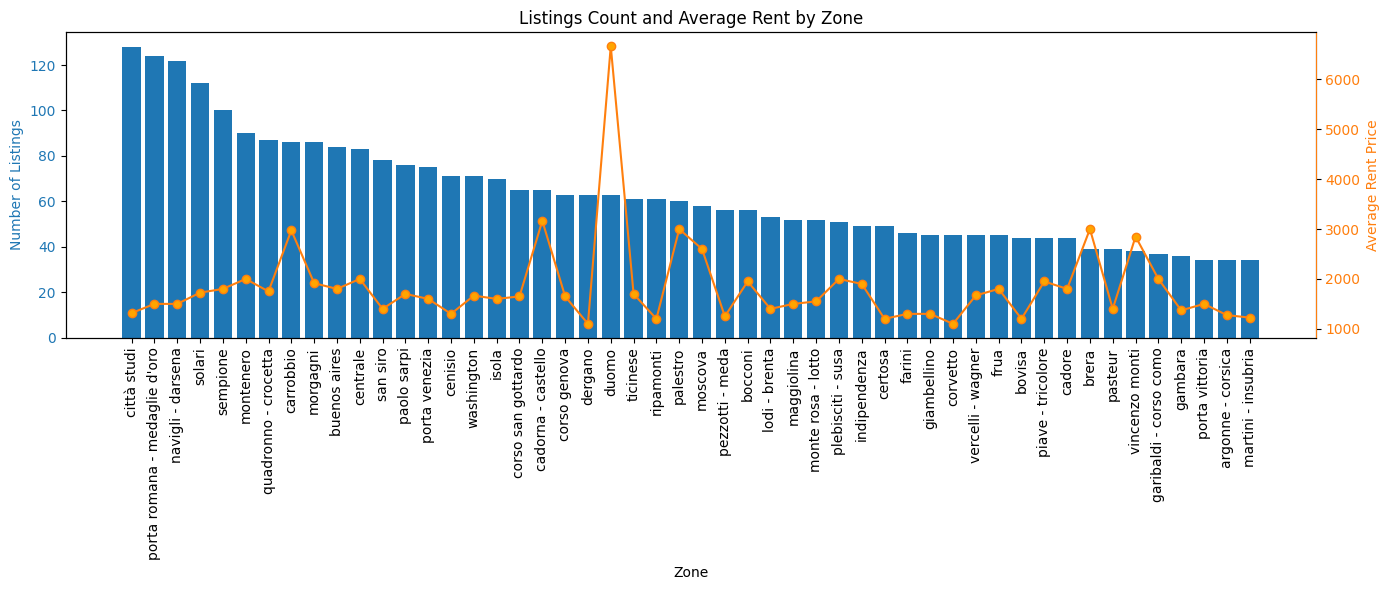

In [ ]:
# 1) Aggregate: count of listings and mean rent per zone
zone_stats = (
    df_train
      .groupby('zone')['y']
      .agg(count='size', mean_rent='median')
      .sort_values('count', ascending=False)
)

# (Optional) If you only want the top 50 zones by count:
zone_stats = zone_stats.head(50)

# 2) Set up the figure and first axis (counts)
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.bar(zone_stats.index, zone_stats['count'])
ax1.set_xlabel('Zone')
ax1.set_ylabel('Number of Listings', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(zone_stats.index, rotation=90)

# 3) Create a second y-axis sharing the same x
ax2 = ax1.twinx()

ax2.plot(
    zone_stats.index,
    zone_stats['mean_rent'],
    marker='o',
    linestyle='-',
    color='tab:orange',    # ← set line (and marker) color here
    markerfacecolor='orange' # ← optional: e.g. white fill for contrast
)

ax2.set_ylabel('Average Rent Price', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# also color the right spine if you want full consistency:
ax2.spines['right'].set_color('tab:orange')

# 4) Final touches
plt.title('Listings Count and Average Rent by Zone')
plt.tight_layout()
plt.show()

### Scatter plot for energy class/square meters and price

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7248\2979094223.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  square_avg = df_train.groupby('square_bins')['y'].mean().reset_index()


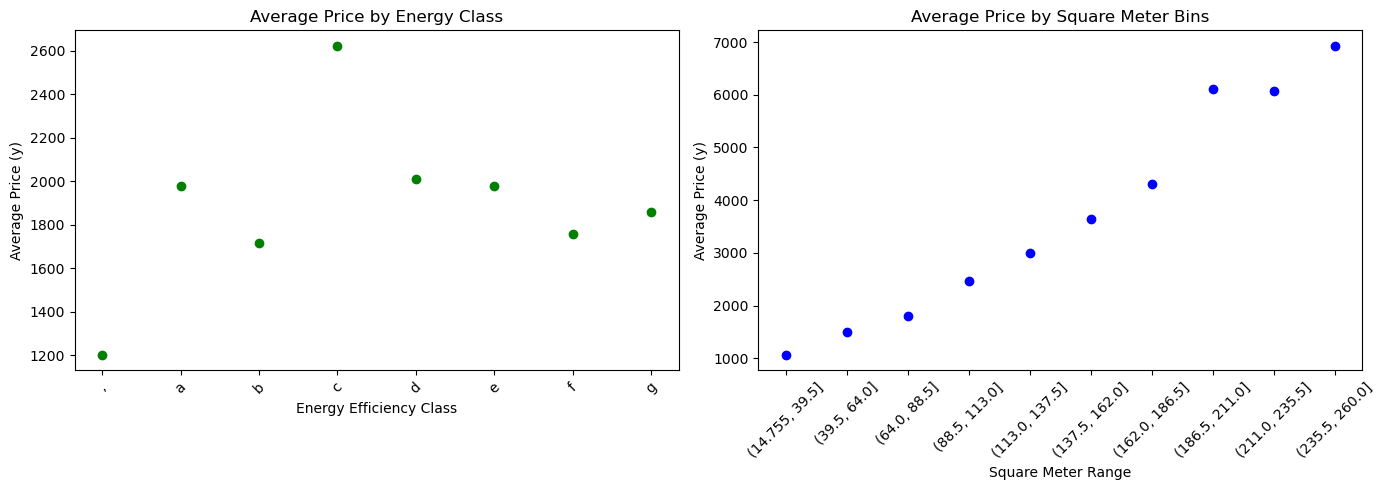

In [18]:
# Group 1: Average price per energy class
energy_avg = df_train.groupby('energy_efficiency_class')['y'].mean().reset_index()

# Group 2: Average price by square meters (binned)
df_train['square_bins'] = pd.cut(df_train['square_meters'], bins=10)  # adjust bins as needed
square_avg = df_train.groupby('square_bins')['y'].mean().reset_index()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot 1: Energy class vs average price
axs[0].scatter(energy_avg['energy_efficiency_class'], energy_avg['y'], color='green')
axs[0].set_title('Average Price by Energy Class')
axs[0].set_xlabel('Energy Efficiency Class')
axs[0].set_ylabel('Average Price (y)')
axs[0].tick_params(axis='x', rotation=45)

# Scatter plot 2: Square meters vs average price
axs[1].scatter(square_avg['square_bins'].astype(str), square_avg['y'], color='blue')
axs[1].set_title('Average Price by Square Meter Bins')
axs[1].set_xlabel('Square Meter Range')
axs[1].set_ylabel('Average Price (y)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation matrix

In [20]:
filtered_df=pd.read_csv('DATASET/filtered_df.csv')
filtered_test=pd.read_csv('DATASET/filtered_test.csv')

In [23]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     4500 non-null   int64  
 1   y                                              4500 non-null   float64
 2   square_meters                                  4500 non-null   int64  
 3   floor                                          4500 non-null   float64
 4   elevator                                       4500 non-null   int64  
 5   high_floor_no_elevator                         4500 non-null   int64  
 6   have_condo_fees                                4500 non-null   int64  
 7   total_rooms                                    4500 non-null   float64
 8   bedrooms                                       4500 non-null   int64  
 9   other_rooms                                    4500 

In [25]:
correlation_matrix = filtered_df.corr(numeric_only=True)
target_corr = correlation_matrix['y'].sort_values(ascending=False)
print(target_corr)

y                                                1.000000
square_meters                                    0.718523
total_rooms                                      0.612475
bedrooms                                         0.589520
zone_encoded                                     0.580731
bathrooms                                        0.577818
other_rooms                                      0.399976
top_concierge                                    0.275335
concierge                                        0.275254
energy_efficiency_class_4                        0.231469
conditions_encoded                               0.180466
luxury                                           0.162887
top_security                                     0.161012
security                                         0.153732
top_fiber                                        0.145385
tv_internet                                      0.128807
contract_type_rent | transitory                  0.121643
top_tv_system 

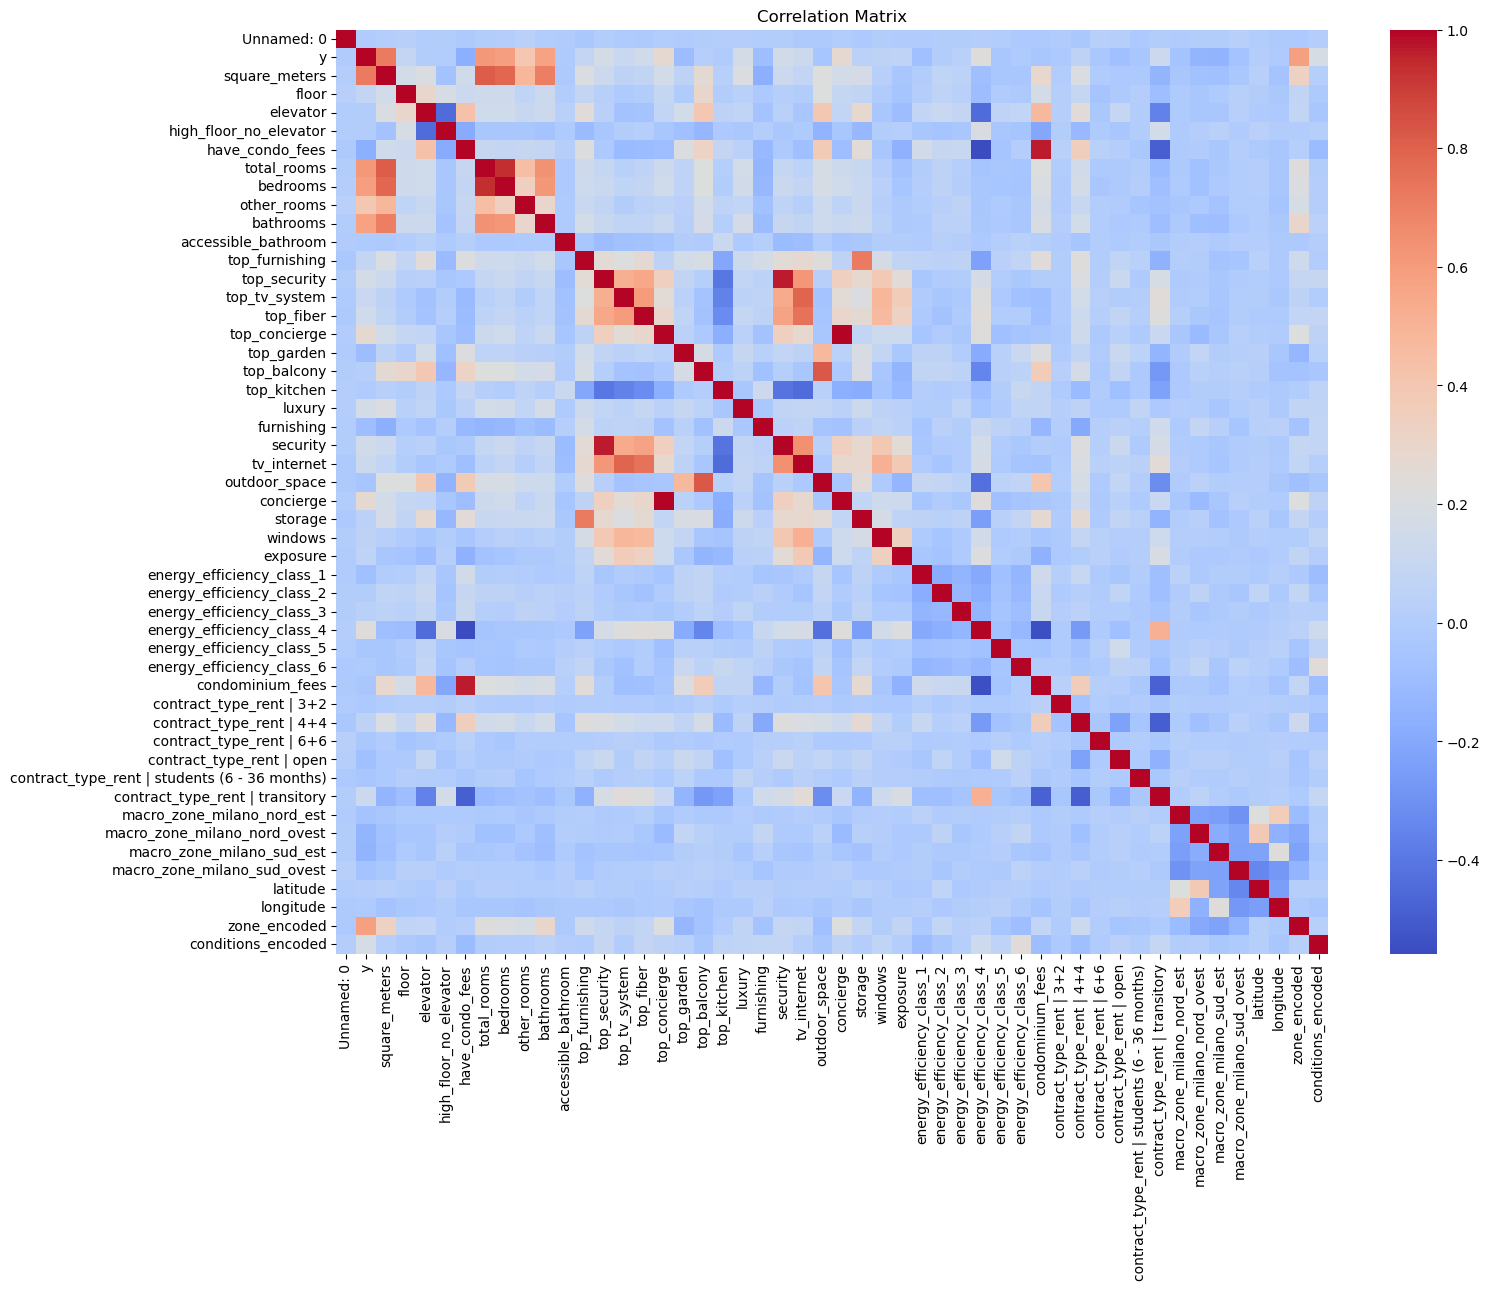

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()